# Assignment on Classification

In [809]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data from local folder

In [810]:
# Read the dataset to python environment
data = pd.read_excel(r"C:\Users\sruth\OneDrive\Desktop\iris (3).xls")

In [811]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [812]:
#Changing the Column name Classification into Species
data.rename(columns={'Classification': 'Species'}, inplace=True)

# Basic Details of Dataset

In [813]:
data.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [814]:
data.shape

(150, 5)

In [815]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [816]:
data.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [817]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       143 non-null    float64
 1   SW       144 non-null    float64
 2   PL       144 non-null    float64
 3   PW       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Pre-processing 

### Missing Value Handling 

In [818]:
data.isna().sum()

SL         7
SW         6
PL         6
PW         0
Species    0
dtype: int64

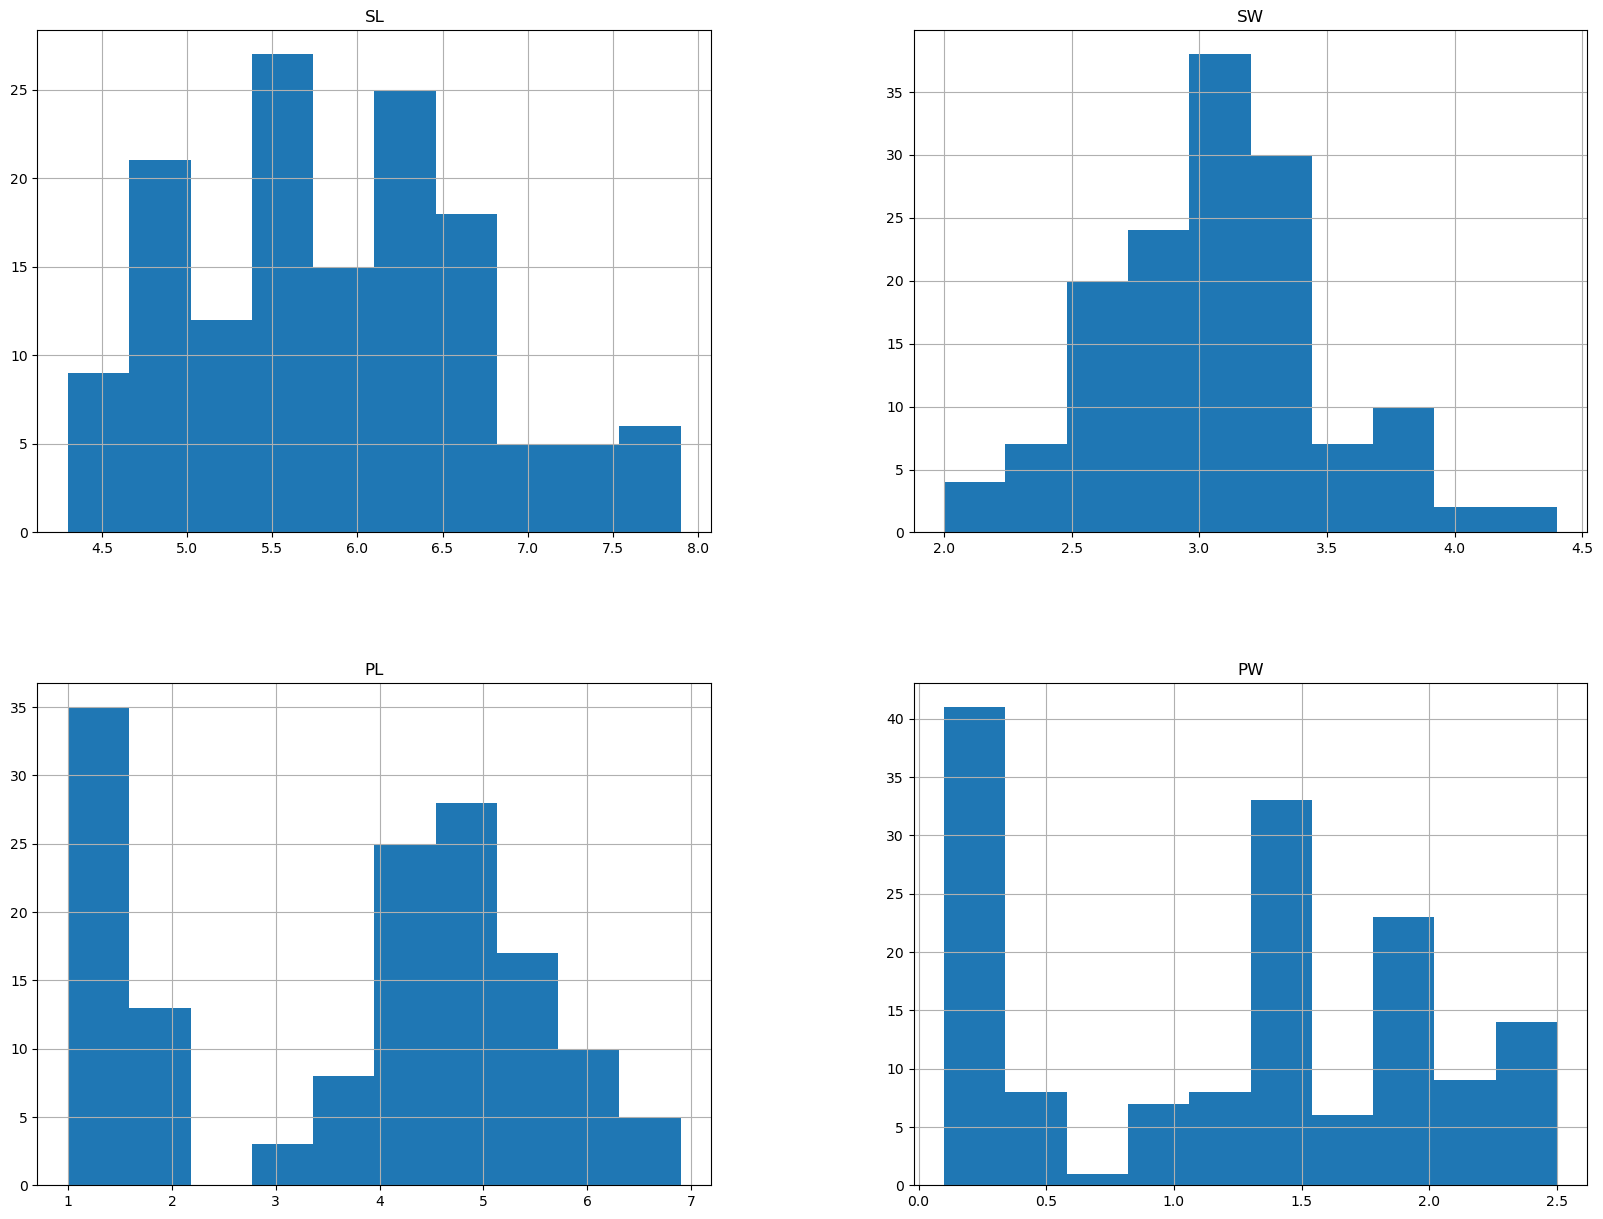

In [819]:
#plotting the data distribution
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [820]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Species'], dtype='object')

In [821]:
for col in ['SL', 'SW', 'PL']:
    data[col]=data[col].fillna(data[col].median())

In [822]:
#Verification
data.isna().sum()

SL         0
SW         0
PL         0
PW         0
Species    0
dtype: int64

found missing values in SL,SW,PL and fill it with median.

### Outlier Handling

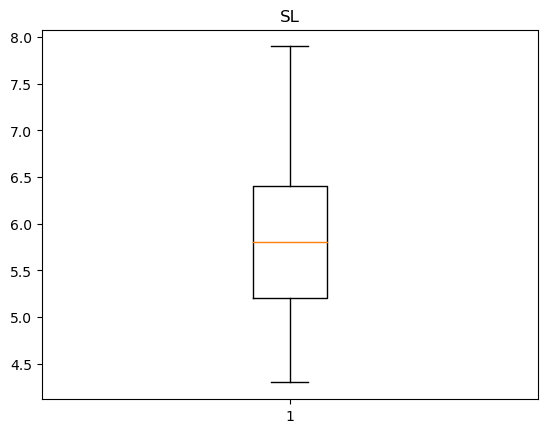

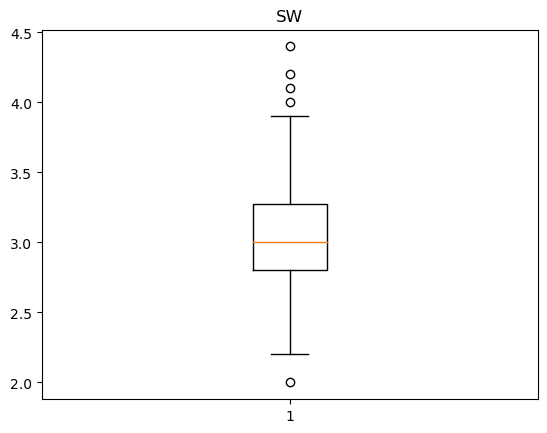

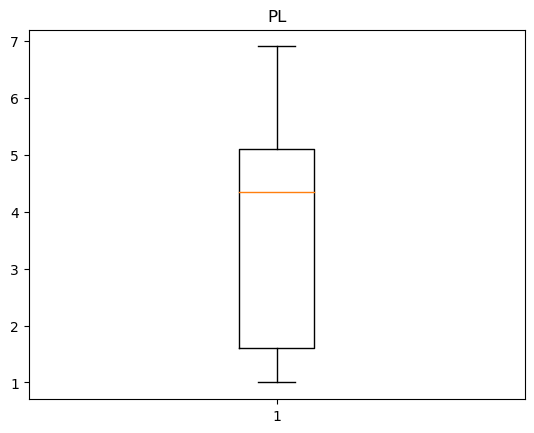

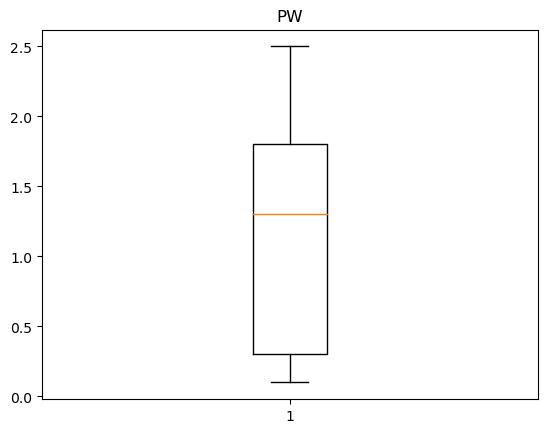

In [823]:
#Detecting outliers
num_cols = ['SL', 'SW', 'PL', 'PW']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [824]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')



In [825]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [826]:
IQR = Q3-Q1

In [827]:
print(IQR)

0.4500000000000002


In [828]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [829]:
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [830]:
outliers = []
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [831]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [832]:
data['SW'] = data['SW'].apply(lambda x: low_lim if x< low_lim else up_lim if x > up_lim else x)

In [833]:
data.shape

(150, 5)

In [834]:
outliers = []
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [835]:
outliers

[]

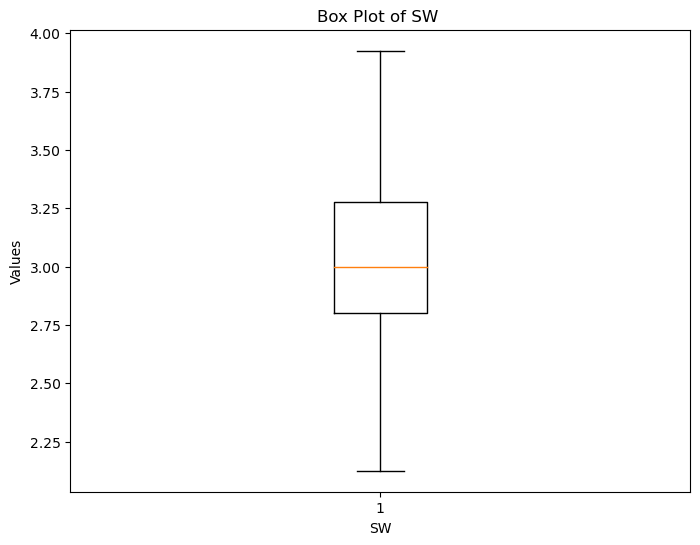

In [836]:
sw_data = data['SW']

# Create the box plot for verification (Outliers)
plt.figure(figsize=(8, 6))
plt.boxplot(sw_data)
plt.title("Box Plot of SW ")
plt.xlabel("SW")
plt.ylabel("Values")
plt.show()

Found outliers in  column SW replace it with corresponding upperlimit and lower limit

In [837]:
 #Split the data into features and target variable 
X = data.drop("Species", axis=1)  # Features
y = data["Species"]  # target

In [838]:
from sklearn.preprocessing import LabelEncoder

In [839]:
#label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [840]:
from sklearn.model_selection import train_test_split

In [841]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Models before scaling

In [842]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr =logit_model.predict(X_test)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [843]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Evaluation
print('Accuracy =', accuracy_score(y_test, y_pred_lr))
print('Precision =', precision_score(y_test, y_pred_lr, average='weighted'))
print('Recall =', recall_score(y_test, y_pred_lr, average='weighted'))
print('F1 Score =', f1_score(y_test, y_pred_lr, average='weighted'))

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


In [844]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [845]:
from sklearn.neighbors import KNeighborsClassifier
matric =[]
neighbors =np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn= classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred_knn)
    matric.append(acc)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

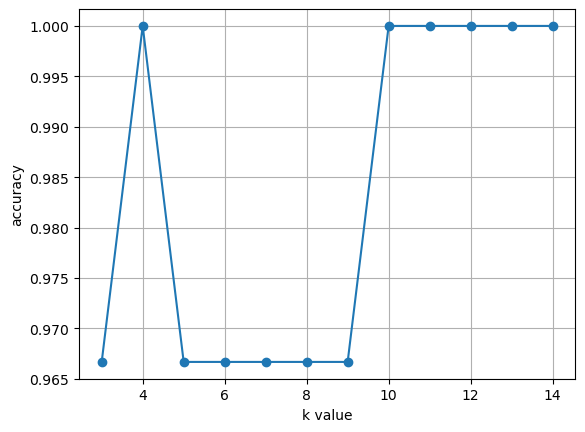

In [846]:
import matplotlib.pyplot as plt
plt.plot(neighbors, matric, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

In [847]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [848]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(y_test, y_pred_knn))
print('Precision =', precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall =', recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score =', f1_score(y_test, y_pred_knn, average='weighted'))


Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


In [849]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Before scaling both models have same accuracy 1.0

# Classification Models after scaling

In [850]:
from sklearn.preprocessing import StandardScaler

In [851]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=['SW','SL', 'PL', 'PW'])

In [852]:
#Verification
X.head()

,SW,SL,PL,PW
0,-0.934811,1.141745,-1.380791,-1.312977
1,-1.182990,-0.103342,-1.380791,-1.312977
2,-0.066181,0.394692,-1.438808,-1.312977
3,-1.555260,0.145675,-1.322775,-1.312977
4,-1.058900,1.390762,-1.380791,-1.312977


In [853]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [854]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr =logit_model.predict(X_test)

In [855]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#Evaluation
print('Accuracy =', accuracy_score(y_test, y_pred_lr))
print('Precision =', precision_score(y_test, y_pred_lr, average='weighted'))
print('Recall =', recall_score(y_test, y_pred_lr, average='weighted'))
print('F1 Score =', f1_score(y_test, y_pred_lr, average='weighted'))

Accuracy = 0.9666666666666667
Precision = 0.9694444444444444
Recall = 0.9666666666666667
F1 Score = 0.9664109121909632


In [856]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [857]:
y_pred_lr



array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [858]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [859]:
from sklearn.neighbors import KNeighborsClassifier
matric =[]
neighbors =np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn= classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred_knn)
    matric.append(acc)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [860]:
matric


[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

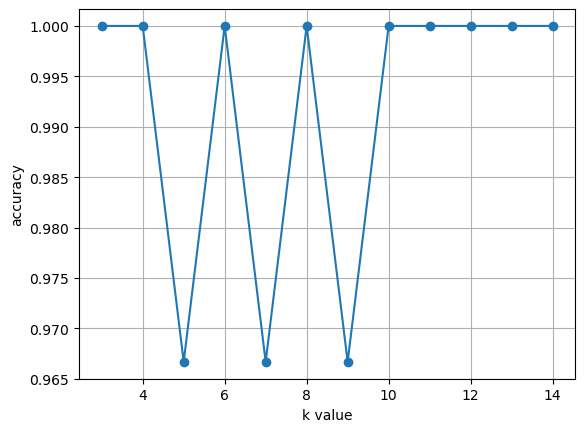

In [861]:
import matplotlib.pyplot as plt
plt.plot(neighbors, matric, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

In [862]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

C:\Users\sruth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [863]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Evaluation
print('Accuracy =', accuracy_score(y_test, y_pred_knn))
print('Precision =', precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall =', recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score =', f1_score(y_test, y_pred_knn, average='weighted'))


Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


In [864]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Accuracy level of Logistic Regression:0.9666666666666667    and    kNN:1.0
It is clear from the accuracy level of both models kNN model is better than that of Logistic Regression.  

# Other models

In [865]:
#SVM Model
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [866]:
y_pred_svm=svmclf.predict(X_test)

In [867]:
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('Precision=',precision_score(y_test,y_pred_svm,average='weighted'))
print('Recall=',recall_score(y_test,y_pred_svm,average='weighted'))
print('F1 Score',f1_score(y_test,y_pred_svm,average='weighted'))

Accuracy= 0.9666666666666667
Precision= 0.9694444444444444
Recall= 0.9666666666666667
F1 Score 0.9664109121909632


In [868]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [872]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [873]:
print('Accuracy=',accuracy_score(y_test,y_pred_dt))
print('Precision=',precision_score(y_test,y_pred_dt,average='weighted'))
print('Recall=',recall_score(y_test,y_pred_dt,average='weighted'))
print('F1 Score',f1_score(y_test,y_pred_dt,average='weighted'))

Accuracy= 1.0
Precision= 1.0
Recall= 1.0
F1 Score 1.0


In [874]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [876]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [877]:
y_pred_rf=rf_clf.predict(X_test)

In [878]:
print('Accuracy=',accuracy_score(y_test,y_pred_rf))
print('Precision=',precision_score(y_test,y_pred_rf,average='weighted'))
print('Recall=',recall_score(y_test,y_pred_rf,average='weighted'))
print('F1 Score',f1_score(y_test,y_pred_rf,average='weighted'))

Accuracy= 1.0
Precision= 1.0
Recall= 1.0
F1 Score 1.0


In [879]:
print(confusion_matrix(y_test,y_pred_rf))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
